# "Sales_Prediction"
DATA_SOURCE = www.kaggle.com

Pradeep Medagiri 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
df=pd.read_csv('datasets_749075_1295494_train.csv')
#X=df.drop('Item_Outlet_Sales',axis=1)
#y=df['Item_Outlet_Sales']
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [3]:
import matplotlib.pyplot as plt

In [4]:
list(df.columns.values.tolist()) 

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [5]:
df.shape

(8523, 12)

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.isnull().sum()[:]

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1172a21d0>,
      dtype=object)

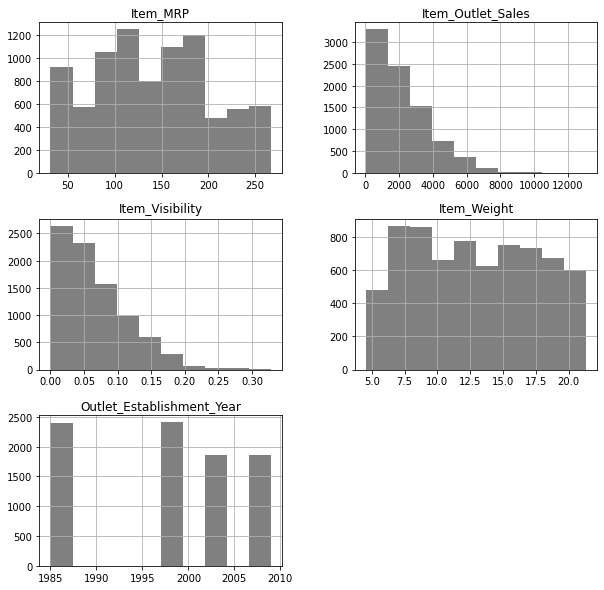

In [9]:
df.hist(figsize = (10,10),color='gray')

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns
#print(df[cat_cols].columns)
#print(df[num_cols].columns)

/Users/pradee/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


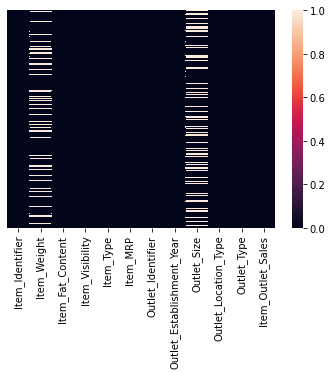

In [11]:
#check for missing values
import seaborn as sns
df.info()
#df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False)

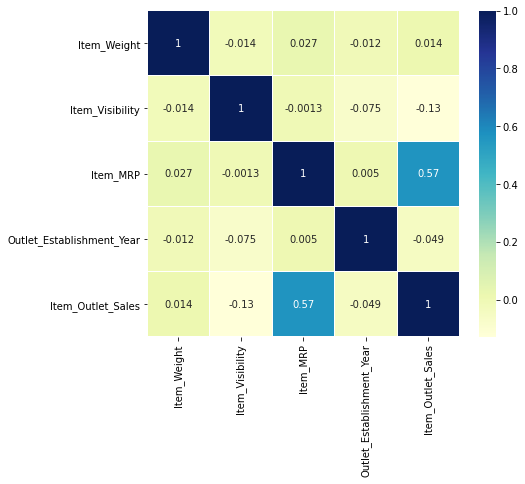

In [12]:
#correlation_matrix
corr_m = df.corr() 
f, ax = plt.subplots(figsize =(7,6)) 
sns.heatmap(corr_m,annot=True, cmap ="YlGnBu", linewidths = 0.1) 

In [13]:
print(df[cat_cols].columns)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [14]:
#bar charts for cat_columns 

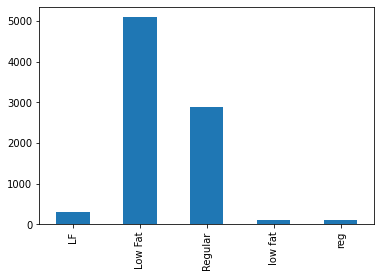

In [15]:
#1_plot(before change)
df['Item_Fat_Content'].value_counts().sort_index().plot.bar()

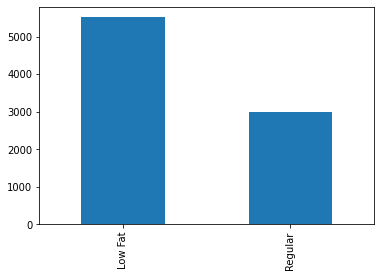

In [16]:
#1_plot(after_change) #1st change in dataset
#LF,low fat and reg is a correction and should be replaced as Low Fat and Regular 
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace = True)
df['Item_Fat_Content'].value_counts().sort_index().plot.bar()

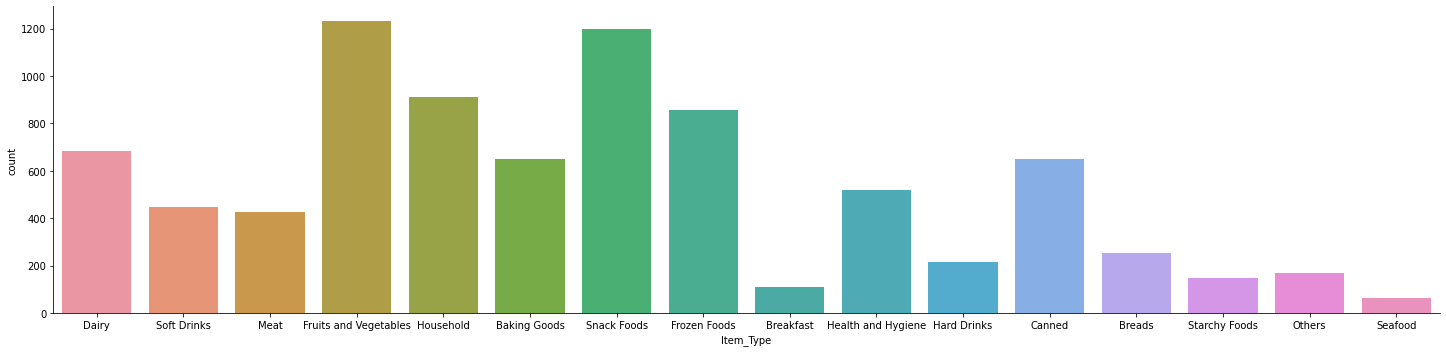

In [17]:
#2_plot
sns.catplot('Item_Type',kind = 'count',data = df,aspect =4)

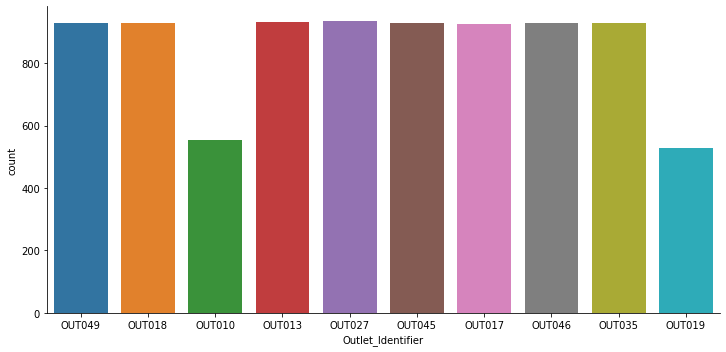

In [18]:
#3_plot
sns.catplot('Outlet_Identifier',kind = 'count',data = df,aspect =2)

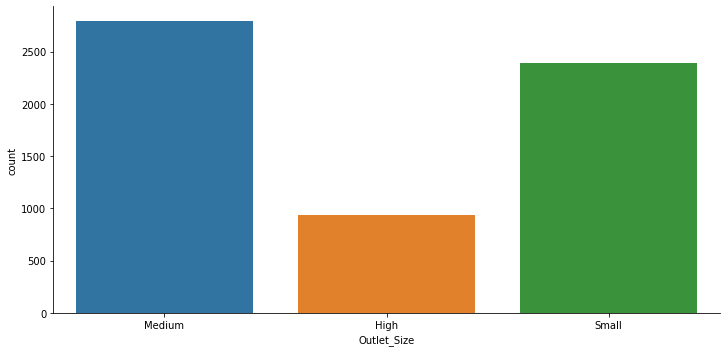

In [19]:
#4_plot (missing values)
sns.catplot('Outlet_Size',kind = 'count',data = df,aspect =2)

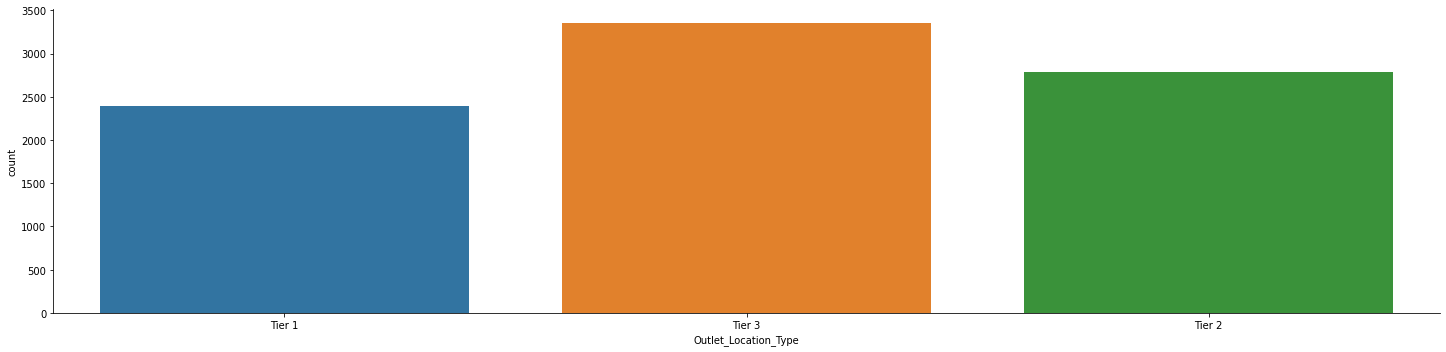

In [20]:
#5_plot
sns.catplot('Outlet_Location_Type',kind = 'count',data = df,aspect =4)

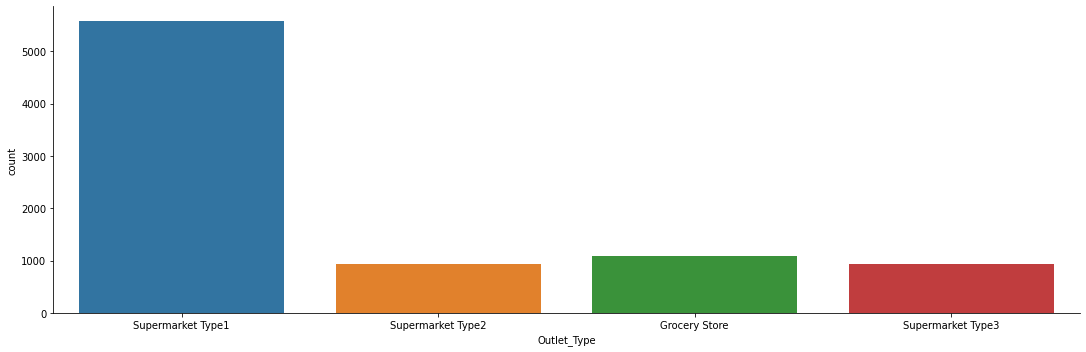

In [21]:
#6_plot
sns.catplot('Outlet_Type',kind = 'count',data = df,aspect =3)

In [22]:
print(df[num_cols].columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [23]:
#bar charts for num_columns 

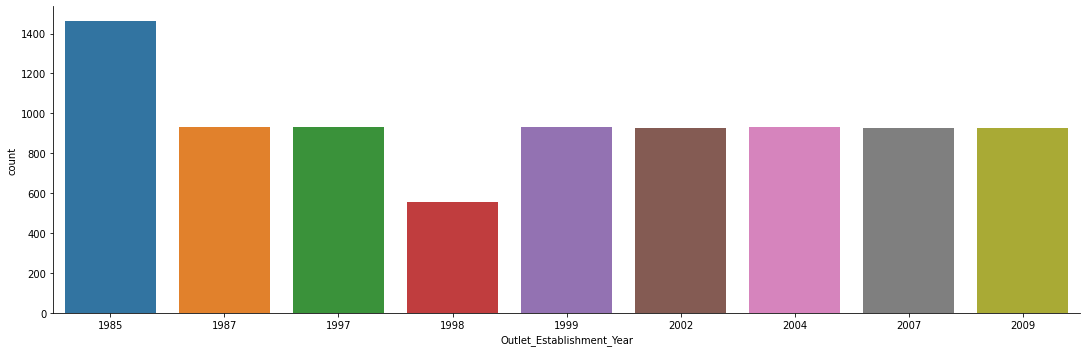

In [24]:
#7_plot
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = df,aspect =3)

In [25]:
#from pandas.plotting import scatter_matrix
#fig, ax = plt.subplots(figsize=(12,12))
#scatter_matrix(df, alpha=1, ax=ax)

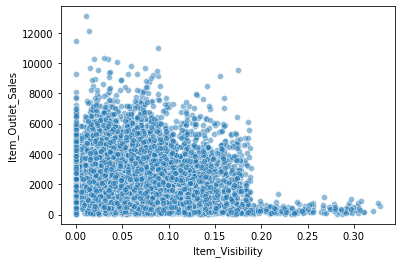

In [26]:
#8_plot
sns.scatterplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = df,alpha = 0.5);

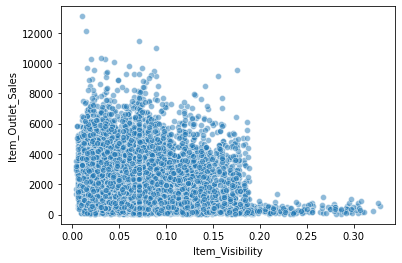

In [27]:
#In above plot, there are more than 500 data points at 0 which doesn't make sense. so considering them as missing values and imputing with mean values.
#2nd change in dataset
a= df[df['Item_Visibility']!=0]['Item_Visibility'].mean()
df['Item_Visibility'] = df['Item_Visibility'].replace(0.00,a)
sns.scatterplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = df,alpha = 0.5);

In [28]:
df['Item_Weight'].isnull().sum(), df['Outlet_Size'].isnull().sum()

(1463, 2410)

Item_Weight and Outlet_Size having missing values:
1. Item_Weight: will replace missing values with mean
2. Outlet_Size: will replace missing values with mode

In [29]:
#1_missing value treated
#from sklearn.impute import KNNImputer
#kn= KNNImputer(weights='distance')
#a= kn.fit_transform(df["Item_Weight"].values.reshape(-1,1))
#df["Item_Weight"]=a

In [30]:
df["Item_Weight"]=df["Item_Weight"].fillna(np.mean(df["Item_Weight"]))

In [31]:
df["Item_Weight"].isnull().sum()

0

In [32]:
df["Outlet_Size"].isnull().sum()

2410

In [33]:
#check for mode
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [34]:
#2_missing value treated
df["Outlet_Size"] = df['Outlet_Size'].replace(np.nan, 'Medium')
df["Outlet_Size"].isnull().sum()

0

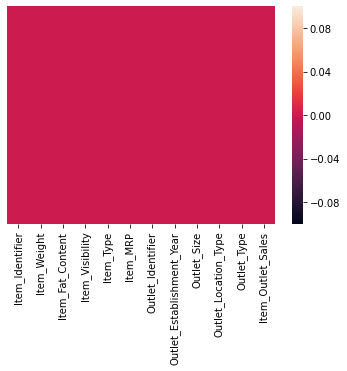

In [35]:
sns.heatmap(df.isnull(), yticklabels=False)

In [36]:
df['Item_Identifier'].head(20)
#all values in 'Item_Identifier' column can be catogerized into 3: FD, DR, NC

0     FDA15
1     DRC01
2     FDN15
3     FDX07
4     NCD19
5     FDP36
6     FDO10
7     FDP10
8     FDH17
9     FDU28
10    FDY07
11    FDA03
12    FDX32
13    FDS46
14    FDF32
15    FDP49
16    NCB42
17    FDP49
18    DRI11
19    FDU02
Name: Item_Identifier, dtype: object

In [37]:
df['Item_Category_Id'] =df['Item_Identifier'].replace({'^FD[A-Z]*[0-9]*':'FD','^DR[A-Z]*[0-9]*':'DR','^NC[A-Z]*[0-9]*':'NC'},regex = True)

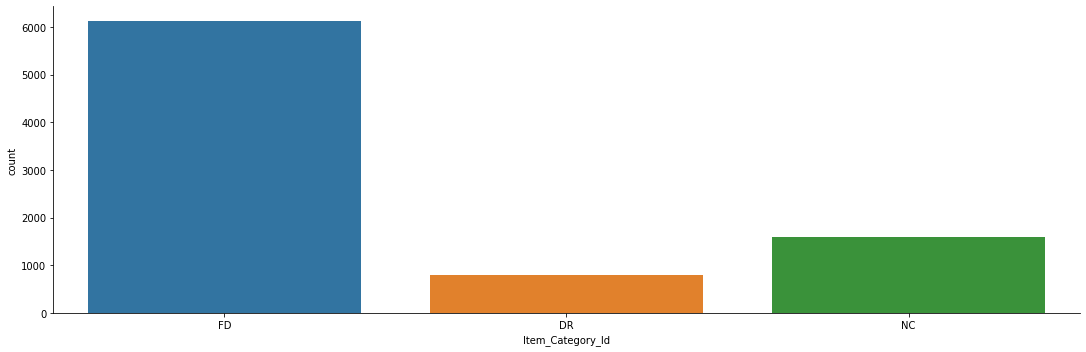

In [38]:
sns.catplot('Item_Category_Id',kind = 'count',data = df,aspect =3)

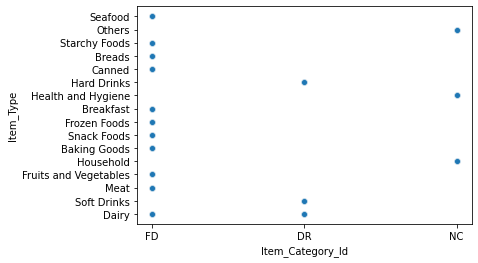

In [39]:
sns.scatterplot(x = 'Item_Category_Id',y = 'Item_Type',data = df,alpha = 0.5);

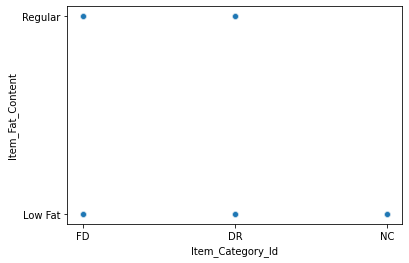

In [40]:
#from the below graph we can say that NC type of food cannot be LowFat.
sns.scatterplot(x = 'Item_Category_Id',y = 'Item_Fat_Content',data = df,alpha = 0.5);

In [41]:
df['Outlet_Age_Years'] = 2020-df['Outlet_Establishment_Year']

In [42]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [43]:
Breakfast = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables","Snack Foods"]
Drinks= ["Soft Drinks", "Hard Drinks","Canned"]
NV=["Meat","Frozen Foods","Seafood"]
Others=["Household","Baking Goods","Health and Hygiene","Others","Starchy Foods"]

In [44]:
items_list=[]
for i in df['Item_Type']:
    if i in Breakfast:
        items_list.append('Breakfast')
    elif (i in Drinks):
        items_list.append('Drinks')
    elif (i in NV):
        items_list.append('NV')    
    elif (i in Others):
        items_list.append('Others')      
df['Item_Type_new'] = items_list

In [45]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet_Size']= le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
#df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
df['Item_Type_new'] = le.fit_transform(df['Item_Type_new'])

In [47]:
df['Item_Category_Id'] = le.fit_transform(df['Item_Category_Id'])

In [48]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category_Id,Outlet_Age_Years,Item_Type_new
0,156,9.300,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,1,21,0
1,8,5.920,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,0,11,1
2,662,17.500,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,1,21,2
3,1121,19.200,1,0.070482,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,1,22,0
4,1297,8.930,0,0.070482,Household,53.8614,1,1987,0,2,1,994.7052,2,33,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,Snack Foods,214.5218,1,1987,0,2,1,2778.3834,1,33,0
8519,897,8.380,1,0.046982,Baking Goods,108.1570,7,2002,1,1,1,549.2850,1,18,3
8520,1357,10.600,0,0.035186,Health and Hygiene,85.1224,6,2004,2,1,1,1193.1136,2,16,3
8521,681,7.210,1,0.145221,Snack Foods,103.1332,3,2009,1,2,2,1845.5976,1,11,0


In [49]:
df = pd.get_dummies(df, columns=['Item_Category_Id','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                     'Item_Type_new','Outlet_Identifier'])

In [50]:
#df['Item_MRP'] = np.log(df['Item_MRP'])
#df['Item_Visibility'] = np.log(df['Item_Visibility'])

In [51]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

In [52]:
df['Item_Identifier'] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df['Item_Identifier'])))

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age_Years,Item_Category_Id_0,Item_Category_Id_1,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,0.100128,9.30,0.016047,Dairy,249.8092,1999,3735.1380,21,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.005135,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,11,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.424904,17.50,0.016760,Meat,141.6180,1999,2097.2700,21,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.719512,19.20,0.070482,Fruits and Vegetables,182.0950,1998,732.3800,22,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0.832478,8.93,0.070482,Household,53.8614,1987,994.7052,33,0,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
#df.info()

In [55]:
X=df.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Identifier','Item_MRP','Item_Type'],axis=1)
y=df['Item_Outlet_Sales']

In [56]:
#model_check_1
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
L_R= LinearRegression()
L_R.fit(X_train,y_train)
y_pred=L_R.predict(X_test)
r2scores= r2_score(y_test,y_pred)
rmses= sqrt(mean_squared_error(y_test,y_pred))
print("r2scores : ",r2scores)
print("rmses : ",rmses)
L_R.score(X_train,y_train),L_R.score(X_test,y_test)
print(L_R.intercept_)

r2scores :  0.2543710752817181
rmses :  1490.07336583876
1449.1067534052029


In [58]:
df.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
Outlet_Age_Years                9
Item_Category_Id_0              2
Item_Category_Id_1              2
Item_Category_Id_2              2
Item_Fat_Content_0              2
Item_Fat_Content_1              2
Outlet_Location_Type_0          2
Outlet_Location_Type_1          2
Outlet_Location_Type_2          2
Outlet_Size_0                   2
Outlet_Size_1                   2
Outlet_Size_2                   2
Outlet_Type_0                   2
Outlet_Type_1                   2
Outlet_Type_2                   2
Outlet_Type_3                   2
Item_Type_new_0                 2
Item_Type_new_1                 2
Item_Type_new_2                 2
Item_Type_new_3                 2
Outlet_Identifier_0             2
Outlet_Identifier_1             2
Outlet_Identif

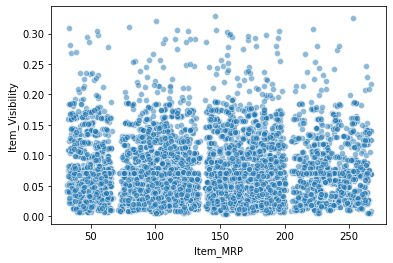

In [59]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Visibility',data = df,alpha = 0.5);

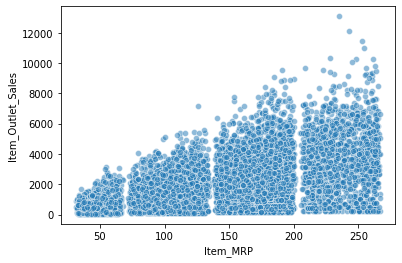

In [60]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = df,alpha = 0.5);

In [61]:
def clusters(x):
    if x<70:
        return 'a'
    elif x in range(70,135):
        return 'b'
    elif x in range(135,200):
        return 'c'
    else:
        return 'd'
df['Item_MRP_Clusters'] = df['Item_MRP'].astype('int').apply(clusters)
df['Item_MRP_Clusters'] = le.fit_transform(df['Item_MRP_Clusters'])

In [62]:
X=df.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Identifier','Item_MRP','Item_Type'],axis=1)
y=df['Item_Outlet_Sales']

In [63]:
#model_check_2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
L_R= LinearRegression()
L_R.fit(X_train,y_train)
y_pred=L_R.predict(X_test)
r2scores= r2_score(y_test,y_pred)
rmses= sqrt(mean_squared_error(y_test,y_pred))
print("r2scores : ",r2scores)
print("rmses : ",rmses)
L_R.score(X_train,y_train),L_R.score(X_test,y_test)
print(L_R.intercept_)

r2scores :  0.5769937343438538
rmses :  1122.3276919201207
1.693443142058186


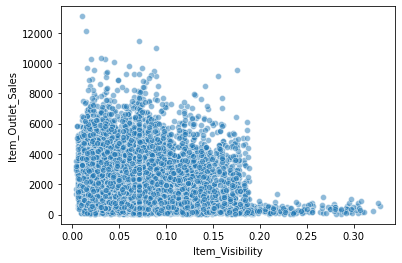

In [64]:
sns.scatterplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = df,alpha = 0.5);

In [65]:
X=df.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Identifier','Item_MRP','Item_Type'],axis=1)
y=df['Item_Outlet_Sales']

In [66]:
#same_duplicate
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
L_R= LinearRegression()
L_R.fit(X_train,y_train)
y_pred=L_R.predict(X_test)
r2scores= r2_score(y_test,y_pred)
rmses= sqrt(mean_squared_error(y_test,y_pred))
print("r2scores : ",r2scores)
print("rmses : ",rmses)
L_R.score(X_train,y_train),L_R.score(X_test,y_test)
print(L_R.intercept_)

r2scores :  0.5769937343438538
rmses :  1122.3276919201207
1.693443142058186


{'whiskers': [<matplotlib.lines.Line2D at 0x124ddf3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x124ddf160>,
 'boxes': [<matplotlib.lines.Line2D at 0x124ddf518>],
 'medians': [<matplotlib.lines.Line2D at 0x124885be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1249094e0>],
 'means': []}

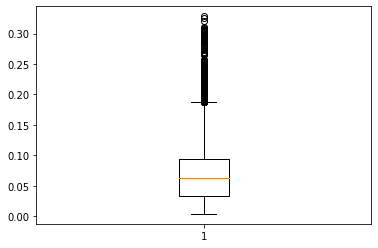

In [67]:
plt.boxplot(df["Item_Visibility"])

In [68]:
print(df['Item_Visibility'].quantile(0.50)) 
print(df['Item_Visibility'].quantile(0.91)) 

0.062516602
0.14270015850000003


In [69]:
df['Item_Visibility'] = np.where(df['Item_Visibility'] > 0.14270015850000003, 0.062516602, df['Item_Visibility'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1225a0b70>,
 'caps': [<matplotlib.lines.Line2D at 0x123e86b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1225a05c0>],
 'medians': [<matplotlib.lines.Line2D at 0x12258a9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12258afd0>],
 'means': []}

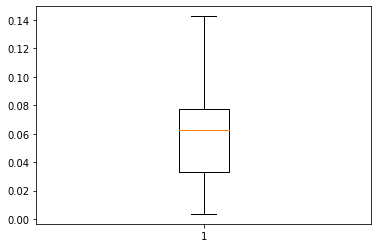

In [70]:
plt.boxplot(df["Item_Visibility"])

In [71]:
#model_1 using LinearRegression

In [72]:
X=df.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Identifier','Item_MRP','Item_Type'],axis=1)
y=df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
L_R= LinearRegression()
L_R.fit(X_train,y_train)
y_pred=L_R.predict(X_test)
r2scores= r2_score(y_test,y_pred)
print("r2scores : ",r2scores)
L_R.score(X_train,y_train),L_R.score(X_test,y_test)
print(L_R.intercept_)

r2scores :  0.5769148686285757
-2.249565436733519


In [73]:
m_a_e=mean_absolute_error(y_test, y_pred)
print(m_a_e)

837.645822080886


In [74]:
#rmse
mse1=mean_squared_error(y_test,y_pred)
L_R_score=np.sqrt(mse1)
L_R_score

1122.432310998074

In [75]:
#cross_val
score=cross_val_score(L_R,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
L_R_score_cross=np.sqrt(-score)
print(np.mean(L_R_score_cross),np.std(L_R_score_cross))

1164.0698690872148 28.32305823089009


In [76]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
4258,2865.6032,2672.383789
2574,2607.2728,1884.432251
517,372.8480,462.496743
3004,850.8924,2470.691570
2159,164.4526,753.590486
...,...,...
5885,2993.4368,2726.883582
3645,852.8898,-177.008543
7023,5020.1320,2670.439844
876,2266.3832,2268.796159


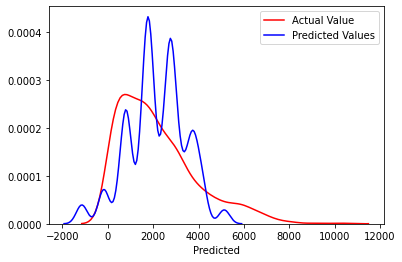

In [77]:
import seaborn as sns
ax1 = sns.distplot(df1['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df1['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)

In [78]:
#model_2 using RandomForestRegressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)

In [80]:
mse2=mean_squared_error(y_test,y_pred2)
rf_score=np.sqrt(mse2)
rf_score

1150.0336700090445

In [81]:
r2scores_2= r2_score(y_test,y_pred2)
r2scores_2

0.5558511376490891

In [82]:
#cross_val
rf=RandomForestRegressor()
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
print(np.mean(rf_score_cross),np.std(rf_score_cross))

1202.5546675621606 25.343813533666882


In [83]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df2

,Actual,Predicted
4258,2865.6032,2608.730902
2574,2607.2728,1949.750913
517,372.8480,749.271346
3004,850.8924,2245.570292
2159,164.4526,342.873684
...,...,...
5885,2993.4368,3247.985456
3645,852.8898,347.853868
7023,5020.1320,2718.361530
876,2266.3832,1436.523422


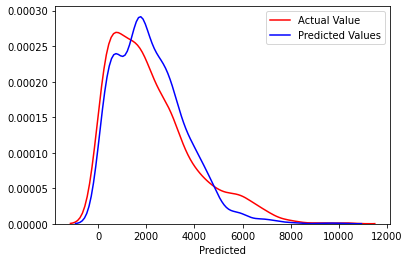

In [84]:
import seaborn as sns
ax1 = sns.distplot(df2['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df2['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)

In [85]:
#model_3 using Lasso

In [86]:
#important_features (for ref only)
from sklearn.linear_model import LassoCV
m_l = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
m_l.fit(X_train, y_train)
#coef = pd.Series(m_l.coef_, index = X_train.columns)
#imp_features = coef.index[coef!=0].tolist()

/Users/pradee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292062342.6762886, tolerance: 1591123.765521159
  tol, rng, random, positive)
/Users/pradee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777847387.5240936, tolerance: 1591123.765521159
  tol, rng, random, positive)
/Users/pradee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722299308.6162977, tolerance: 1591123.765521159
  tol, rng, random, positive)
/Users/pradee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: 

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [87]:
y_pred3 = m_l.predict(X_test)
mse3=mean_absolute_error(y_test,y_pred3)
mse3

836.9534371156432

In [88]:
score=np.sqrt(mse3)
score

28.93014754742262

In [89]:
r2scores_3= r2_score(y_test,y_pred3)
r2scores_3

0.5771500096948688

In [90]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
df3

,Actual,Predicted
4258,2865.6032,2691.244150
2574,2607.2728,1882.721513
517,372.8480,467.839690
3004,850.8924,2480.127214
2159,164.4526,785.490269
...,...,...
5885,2993.4368,2724.319874
3645,852.8898,-164.404910
7023,5020.1320,2680.805977
876,2266.3832,2247.334338


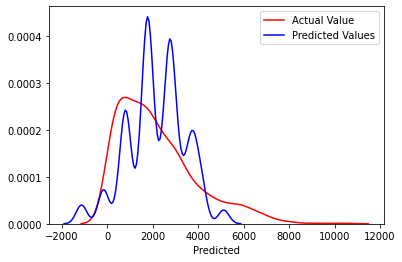

In [91]:
import seaborn as sns
ax1 = sns.distplot(df3['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df3['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)

In [92]:
mse1,mse2,mse3

(1259854.292772477, 1322577.442154472, 836.9534371156432)

In [93]:
L_R_score, rf_score ,score

(1122.432310998074, 1150.0336700090445, 28.93014754742262)

In [94]:
F_scores = {'Model':  ['L_R', 'RF_R','LASSO'],
         'RMSE': [L_R_score, rf_score ,score],
            'R2': [r2scores,r2scores_2,r2scores_3]}

In [95]:
df_scores = pd.DataFrame (F_scores, columns = ['Model','RMSE','R2'])
df_scores

,Model,RMSE,R2
0,L_R,1122.432311,0.576915
1,RF_R,1150.033670,0.555851
2,LASSO,28.930148,0.577150


# THANK_YOU